<a href="https://colab.research.google.com/github/Razanhus/t5/blob/main/Week3_Ensemble_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Practice Notebook

Welcome to the practice notebook on ensemble methods! This notebook will guide you through the process of using ensemble techniques to predict customer churn. The dataset consists of various features related to bank customers, and your goal is to build predictive models to determine whether a customer will churn. Here is a brief explanation of the dataset's columns:

- **`customer_id`**: A unique identifier for each customer.
- **`credit_score`**: The customer's credit score.
- **`country`**: The country where the customer resides.
- **`gender`**: The customer's gender.
- **`age`**: The customer's age.
- **`tenure`**: The number of years the customer has been with the bank.
- **`balance`**: The customer's account balance.
- **`products_number`**: The number of bank products the customer uses.
- **`credit_card`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **`active_member`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **`estimated_salary`**: The customer's estimated annual salary.
- **`churn`**: The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).

As you work through the notebook, you will load the data, preprocess it, and apply various ensemble methods such as Random Forest to predict the churn status. Remember to evaluate the performance of your models using appropriate metrics. Enjoy your practice and aim to identify the most effective ensemble technique for this problem!

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

# Import Libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import StackingClassifier




In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
import seaborn as sns

# Load the dataset


In [332]:
df= pd.read_csv('/content/Bank Customer Churn Prediction.csv')


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and anomalies in the dataset. Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `churn` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features to identify potential multicollinearity.

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding. In this dataset, the `country` and `gender` columns are categorical.

3. **Feature Scaling**: Standardize or Normalize numerical features to have a consistent scale, especially if you plan to use models sensitive to feature scaling. Consider using StandardScaler or MinMaxScaler from the `sklearn.preprocessing` module.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. For instance, `customer_id` is a unique identifier and doesn't contribute to predicting churn.

In [333]:
pd.get_dummies(df, columns=['gender'])

,customer_id,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,15634602,619,France,42,2,0.00,1,1,1,101348.88,1,True,False
1,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0,True,False
2,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1,True,False
3,15701354,699,France,39,1,0.00,2,0,0,93826.63,0,True,False
4,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,39,5,0.00,2,1,0,96270.64,0,False,True
9996,15569892,516,France,35,10,57369.61,1,1,1,101699.77,0,False,True
9997,15584532,709,France,36,7,0.00,1,0,1,42085.58,1,True,False
9998,15682355,772,Germany,42,3,75075.31,2,1,0,92888.52,1,False,True


In [334]:
pd.get_dummies(df)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [335]:
from sklearn.preprocessing import OneHotEncoder

In [336]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['gender','country']]).toarray()

In [337]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df[['gender']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [338]:
df['country'] = le.fit_transform(df[['country']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


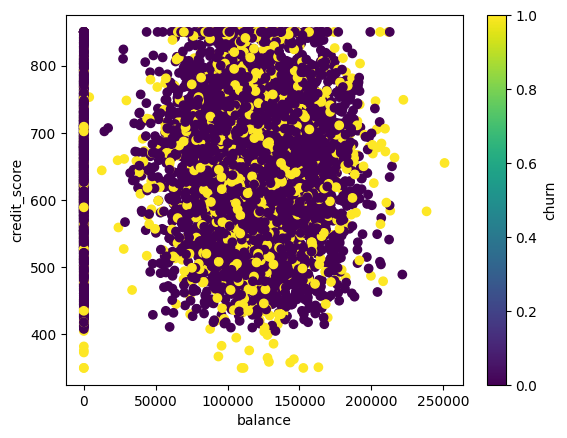

In [339]:
plt.scatter(df['balance'], df['credit_score'], c=df['churn'])
plt.xlabel('balance')
plt.ylabel('credit_score')
plt.colorbar(label='churn')
plt.show()

In [340]:
numeric_df= df.select_dtypes(include = np.number)
corr = numeric_df.corr()
print(corr)

                  customer_id  credit_score   country    gender       age  \
customer_id          1.000000      0.005308  0.006516 -0.002641  0.009497   
credit_score         0.005308      1.000000  0.007888 -0.002857 -0.003965   
country              0.006516      0.007888  1.000000  0.004719  0.022812   
gender              -0.002641     -0.002857  0.004719  1.000000 -0.027544   
age                  0.009497     -0.003965  0.022812 -0.027544  1.000000   
tenure              -0.014883      0.000842  0.003739  0.014733 -0.009997   
balance             -0.012419      0.006268  0.069408  0.012087  0.028308   
products_number      0.016972      0.012238  0.003972 -0.021859 -0.030680   
credit_card         -0.014025     -0.005458 -0.008523  0.005766 -0.011721   
active_member        0.001665      0.025651  0.006724  0.022544  0.085472   
estimated_salary     0.015271     -0.001384 -0.001369 -0.008112 -0.007201   
churn               -0.006248     -0.027094  0.035943 -0.106512  0.285323   

<Axes: >

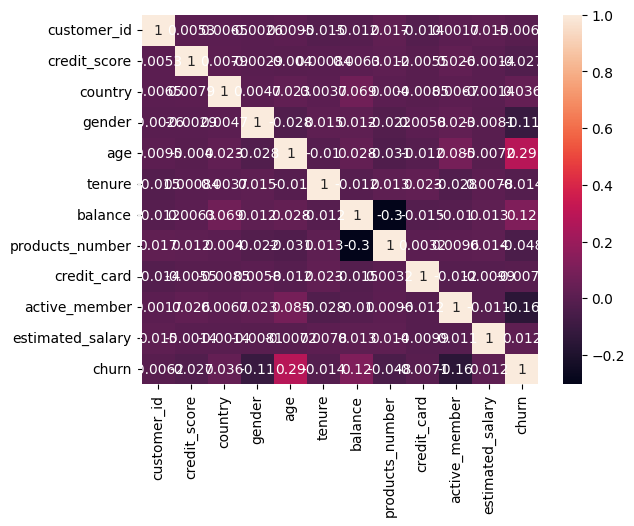

In [341]:
sns.heatmap(corr,annot = True)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Distribution of Numerical Features**: Plot histograms to see the distribution of numerical features such as `age`, `balance`, and `estimated_salary`.

2. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as `country`, `gender`, and `products_number`.

3. **Churn Rate Analysis**: Visualize the churn rate in relation to different features to identify patterns or factors that might influence churn.

4. **Pair Plot**: Use a pair plot to visualize relationships between numerical features and see how they are distributed across different classes of the target variable.

5. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

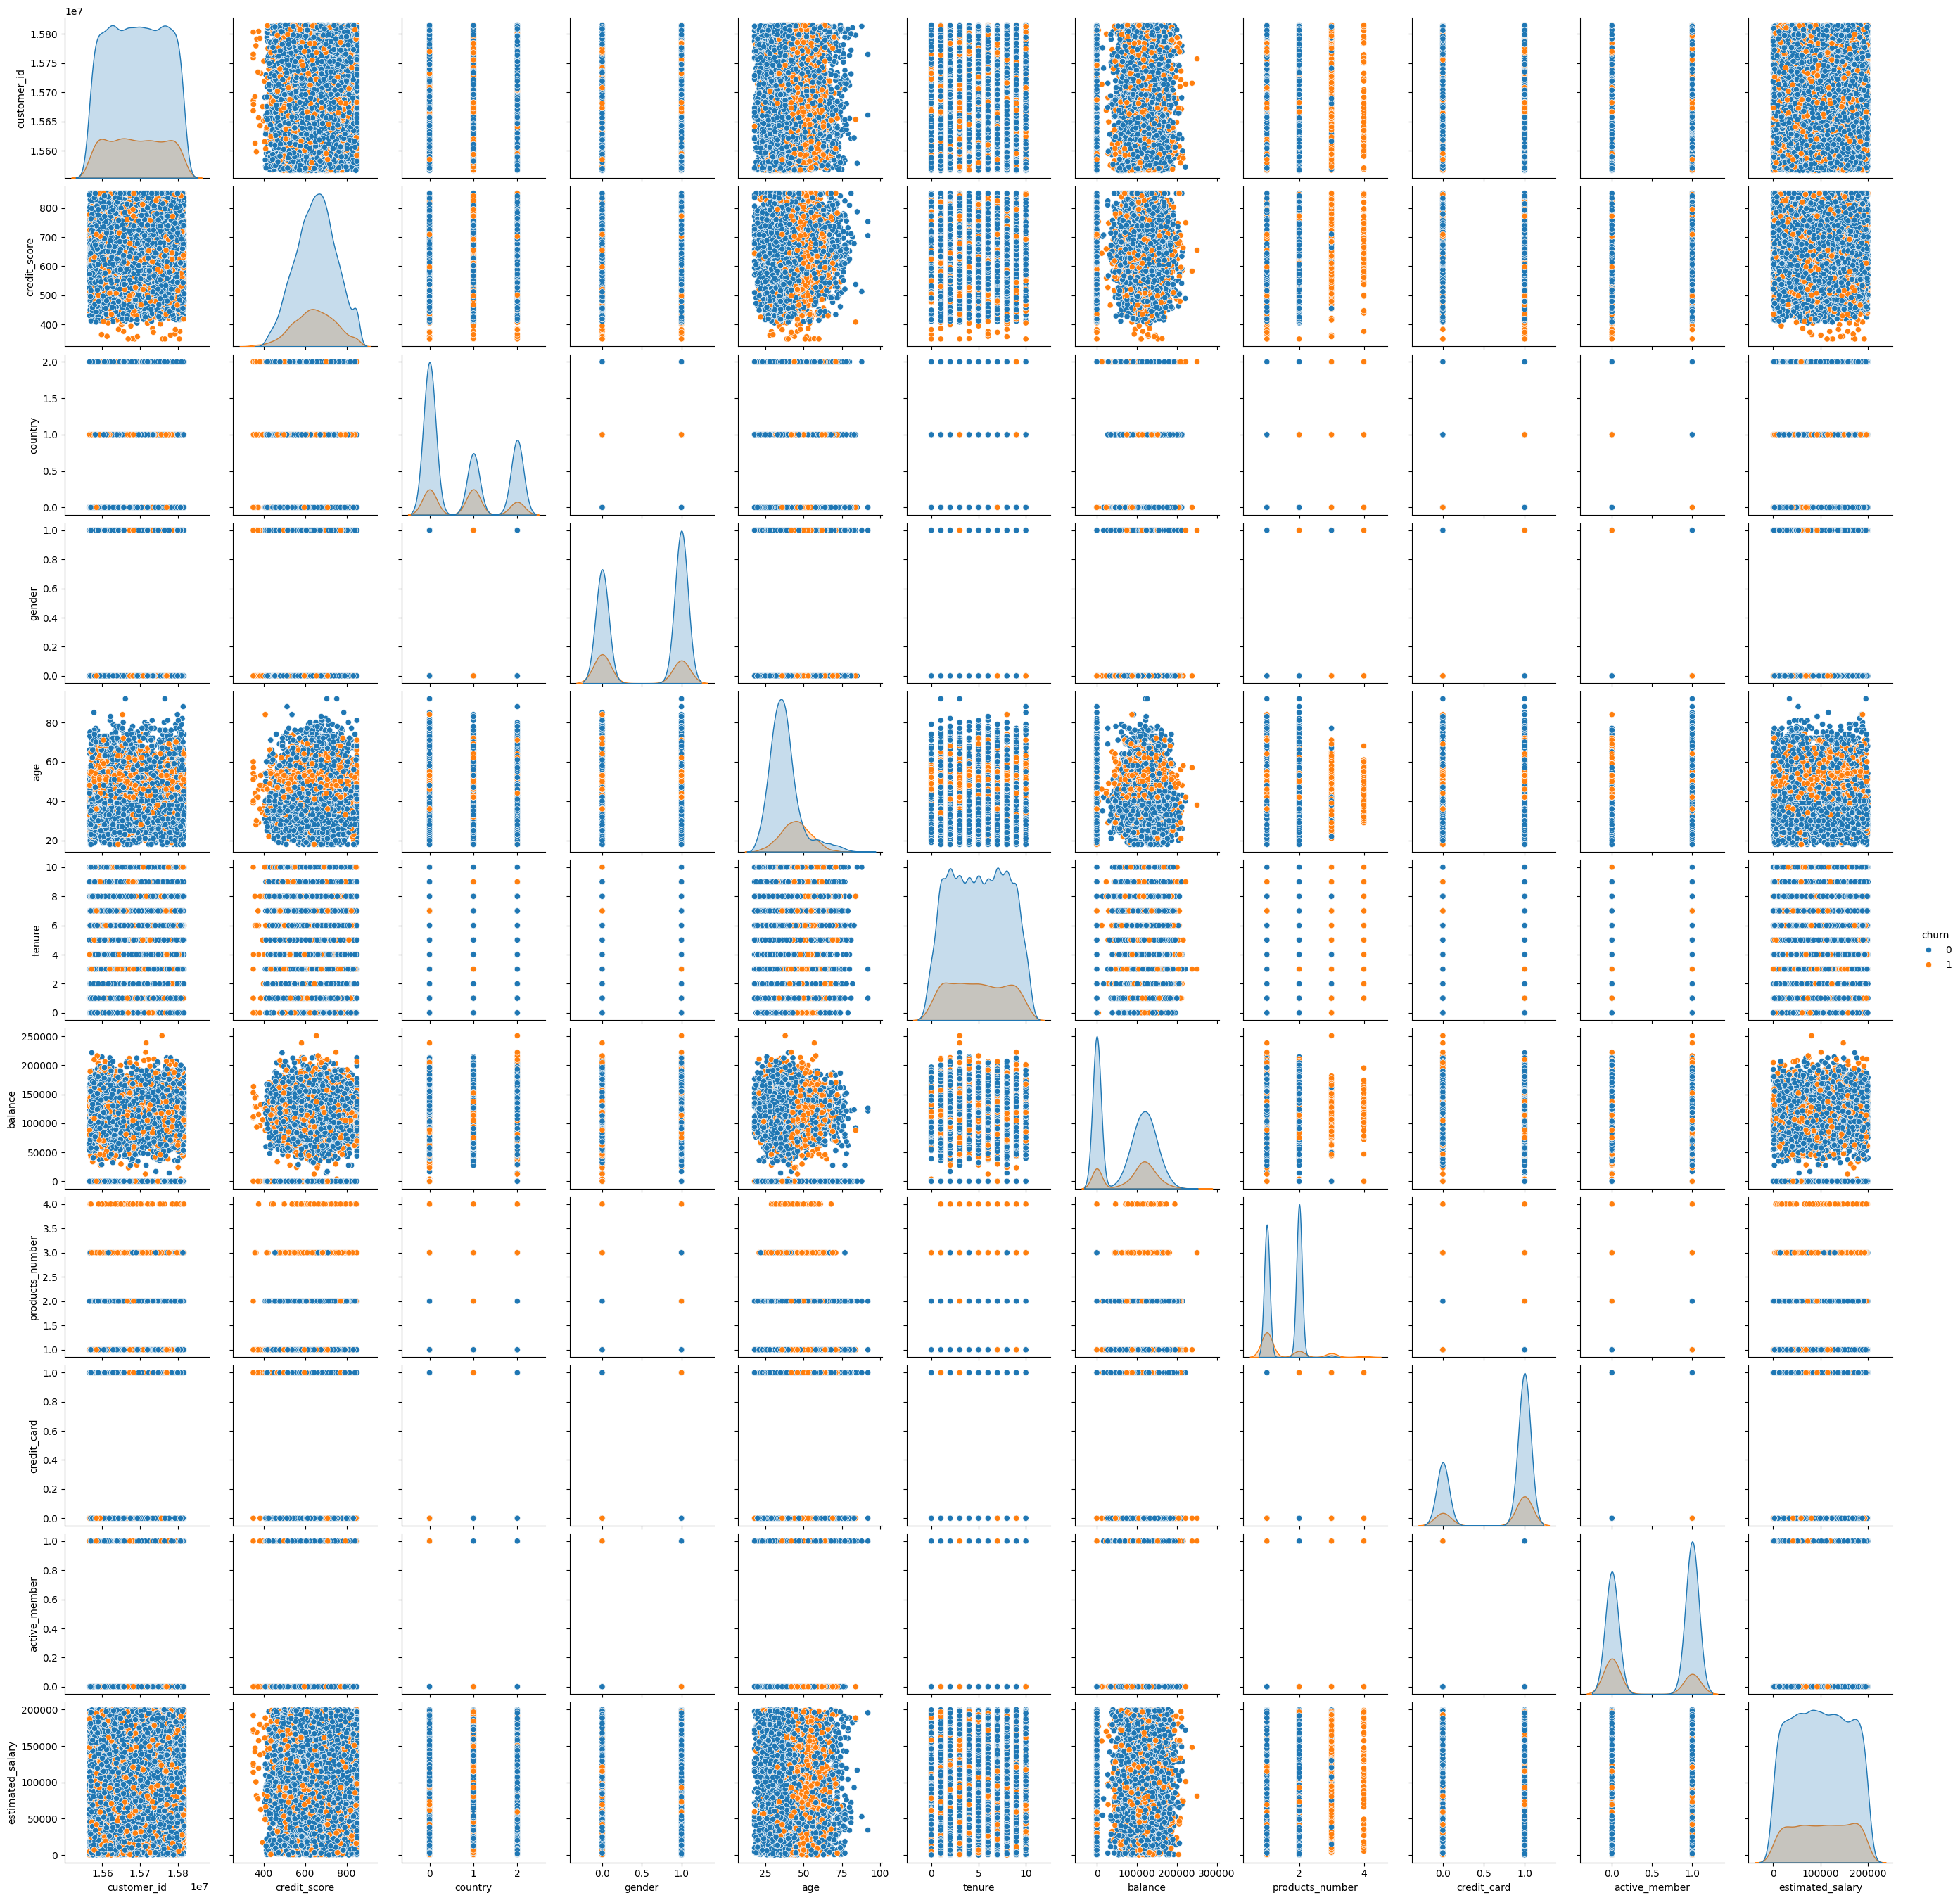

In [320]:
#sns.pairplot(df, hue ='churn')
#plt.show()

# Split the Dataset

Splitting the dataset into training and testing sets is essential for evaluating the performance of your models. This ensures that the models are trained and evaluated on separate data, providing an unbiased assessment of their predictive capabilities.

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data. Typically, 70-80% of the data is used for training, and 20-30% is used for testing.

In [321]:
x = df.drop('churn',axis=1)
y = df['churn']

In [322]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [323]:
x_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,15601116,686,0,1,32,6,0.00,2,1,1,179093.26
1561,15766374,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,15716994,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,15730759,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,15797900,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,15681075,682,0,0,58,1,0.00,1,1,1,706.50
5390,15573851,735,0,0,38,1,0.00,3,0,0,92220.12
860,15807663,667,0,1,43,8,190227.46,1,1,0,97508.04


In [324]:
y_train.shape

(8000,)

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [325]:
rfc = RandomForestClassifier()


In [342]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [343]:
y_pred = rfc.predict(x_test)

### Evaluate the model performance

In [328]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.868


## XGBoost
Initialize and train an XGBoost classifier.

In [344]:
model = xgb.XGBClassifier()

model.fit(x_train,y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [345]:
y_pred = model.predict(x_test)

### Evaluate the model performance

In [347]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8645


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [349]:
estimators = [
    ('rfc',RandomForestClassifier()),
    ('xgb',xgb.XGBClassifier())
]

### Define meta-learner (LogisticRegression)

In [351]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [353]:
stacking_model.fit(x_train,y_train)
y_pred = stacking_model.predict(x_test)

### Evaluate the model performance

In [354]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8705


# Practice Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

* **Challenges and Learnings**
   - What were the main challenges you faced during this project, and how did you overcome them?
   - What are your key takeaways from this exercise, and how would you apply these learnings to future projects?


# Answer here: